In [2]:
# Loading necessary modules.
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os import fspath
%matplotlib inline
import seaborn as sns
import math
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.analysis.align import AlignTraj
from MDAnalysis.analysis.rms import RMSD, RMSF
from MDAnalysis.analysis.pca import PCA, cosine_content
from MDAnalysis.analysis import diffusionmap
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

/home/giacomo/micromamba/envs/QCB/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [3]:
sel = 'name CA'
data_path = "../../data_3eig/02_processed/02_npt/"
config_file = data_path + "step5_prod_0.tpr"
concat_traj_file = data_path + "prod_cat.xtc"


aligned_traj = mda.Universe(config_file, concat_traj_file)

Text(0, 0.5, 'Radius of Gyration')

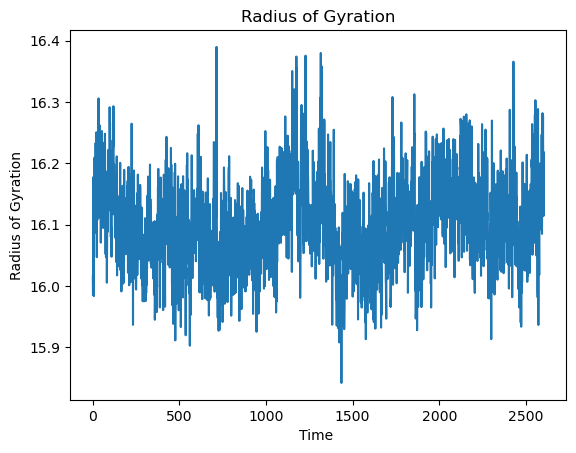

In [4]:
atom_group = aligned_traj.select_atoms(sel)

radii_o_gyr = []

for ts in aligned_traj.trajectory:
    rg = atom_group.radius_of_gyration()
    radii_o_gyr.append(rg)

plt.title('Radius of Gyration')
plt.plot(radii_o_gyr)
plt.xlabel('Time ')
plt.ylabel('Radius of Gyration')

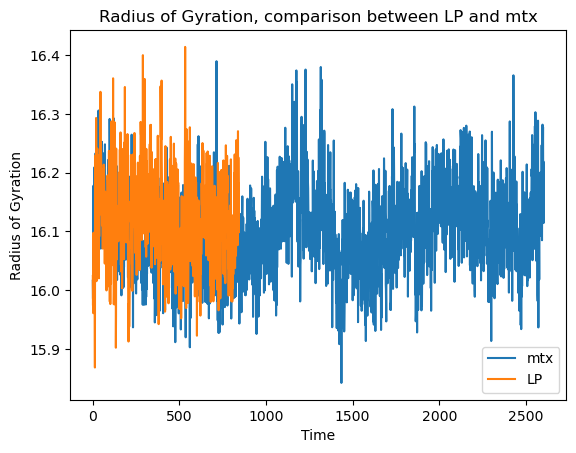

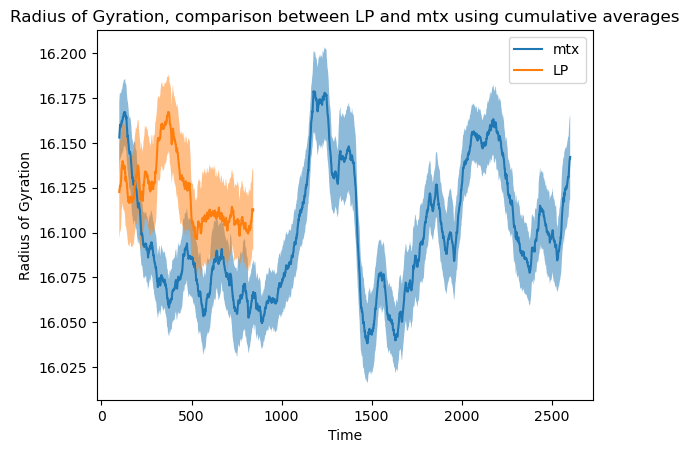

In [5]:
# comparison with lone protein
LP_path = "../../data/02_processed/02_prod/rgyr.csv"
LP_rgyr = pd.read_csv(LP_path)

plt.title('Radius of Gyration, comparison between LP and mtx')
plt.plot(radii_o_gyr, label = "mtx")
plt.plot(LP_rgyr['rgyr'], label = "LP")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Radius of Gyration')
plt.show()

rg_mtx_df = pd.DataFrame({"rgyr": radii_o_gyr})

err_LP = np.sqrt(LP_rgyr.rolling(100).var()["rgyr"] / 10)
mean_LP = LP_rgyr.rolling(100).mean()["rgyr"] 
err_MTX = np.sqrt(rg_mtx_df.rolling(100).var()["rgyr"] / 10)
mean_MTX = rg_mtx_df.rolling(100).mean()["rgyr"] 
plt.title('Radius of Gyration, comparison between LP and mtx using cumulative averages')
plt.plot(mean_MTX, label = "mtx")
plt.fill_between(rg_mtx_df.index, mean_MTX - err_MTX, mean_MTX + err_MTX, alpha = 0.5)
plt.plot(mean_LP, label = "LP")
plt.fill_between(LP_rgyr.index, mean_LP - err_LP, mean_LP + err_LP, alpha = 0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Radius of Gyration')
plt.show()

In [6]:
# We may want to check for the radius of gyration only of the "interaction pocket" of the protein

In [8]:
sel_pocket = "name CA and resid 130:300"

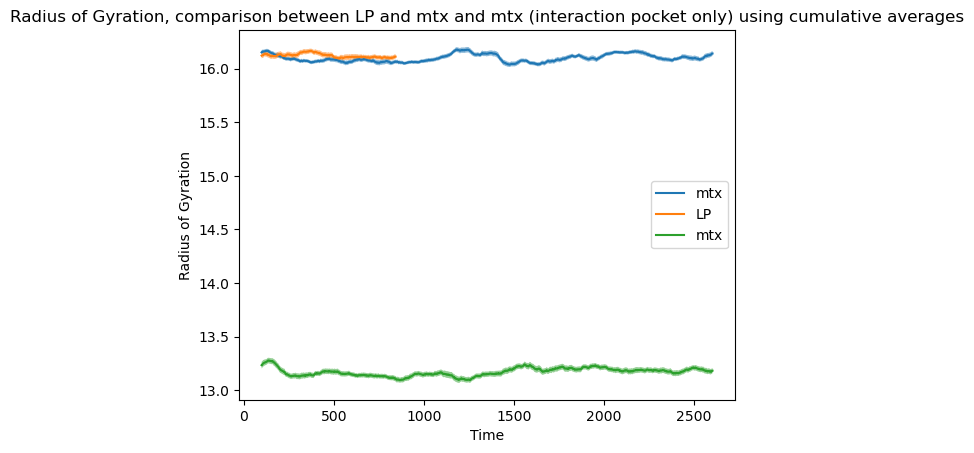

In [9]:
ag_pocket = aligned_traj.select_atoms(sel_pocket)
rog_pocket = []

for ts in aligned_traj.trajectory:
    rg = ag_pocket.radius_of_gyration()
    rog_pocket.append(rg)

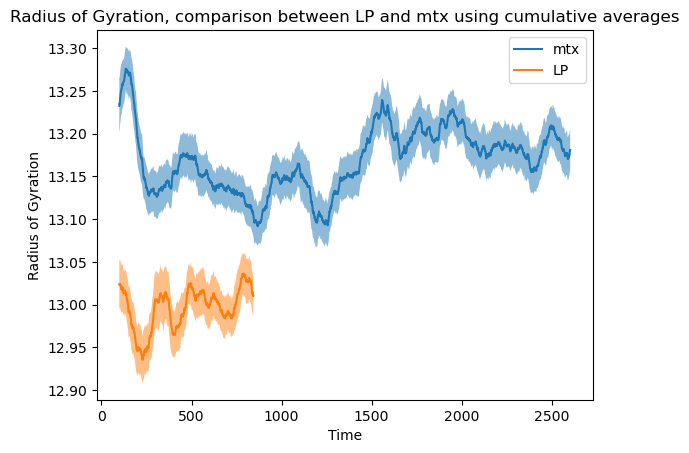

In [12]:
LPP_path = "../../data/02_processed/02_prod/rgyr_pocket.csv"
LPP_rgyr = pd.read_csv(LPP_path)

rog_pocket_df = pd.DataFrame({"rgyr": rog_pocket})

err_pocket = np.sqrt(rog_pocket_df.rolling(100).var()["rgyr"] / 10)
mean_pocket = rog_pocket_df.rolling(100).mean()["rgyr"] 

err_LPP = np.sqrt(LPP_rgyr.rolling(100).var()["rgyr"] / 10)
mean_LPP = LPP_rgyr.rolling(100).mean()["rgyr"] 
plt.title('Radius of Gyration, comparison between LP and mtx using cumulative averages')
plt.plot(mean_pocket, label = "mtx")
plt.fill_between(rog_pocket_df.index, mean_pocket - err_pocket, mean_pocket + err_pocket, alpha = 0.5)
plt.plot(mean_LPP, label = "LP")
plt.fill_between(LPP_rgyr.index, mean_LPP - err_LPP, mean_LPP + err_LPP, alpha = 0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Radius of Gyration')
plt.show()